In [1]:
import os
os.getcwd() # to show current working directory

'C:\\Users\\Lenovo'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("Automobile_data.csv")

In [3]:
df.head() # first five records

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
df.shape

(205, 15)

In [5]:
df.shape[0] # where 0 is rows and 1 is columns

205

In [6]:
# to handle missing values
# to first check null values
df.isnull().sum()

# it is always nice to have 0 null values as it eases our task to clean

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# it is rare to get such data with 0 null values in real world
df.info()

# machine learning accepts only numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [8]:
# verify the value of normalized losses as it has certain irregularity
df["normalized-losses"].unique()
# despite being numeric it appears object because of question mark 
# which makes all the data in normalized losses as string

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [9]:
df["normalized-losses"].value_counts()
# to check number of ? in data to decipher the null-data 

?      41
161    11
91      8
150     7
128     6
134     6
104     6
74      5
65      5
95      5
102     5
85      5
94      5
168     5
103     5
148     4
106     4
93      4
122     4
118     4
154     3
115     3
137     3
101     3
83      3
125     3
81      2
164     2
158     2
110     2
89      2
197     2
113     2
194     2
108     2
188     2
145     2
119     2
87      2
192     2
153     2
129     2
90      1
121     1
186     1
142     1
77      1
256     1
107     1
98      1
78      1
231     1
Name: normalized-losses, dtype: int64

In [10]:
# np.nan :  to create null value in a dataset
# replace ? with null values in normalized-losses column
df["normalized-losses"].replace("?",np.nan, inplace=True)
# replace("old value","new value",inplace=True for permanent replacement)

In [11]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

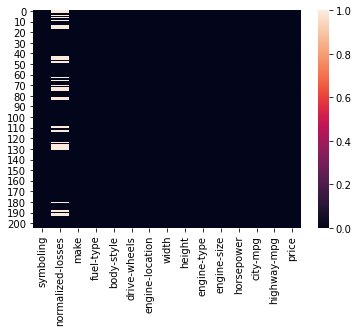

In [12]:
sns.heatmap(df.isnull()) # to get heat map of null values
plt.show()
# white represents null

In [13]:
# find %age of null values in normalized column
df["normalized-losses"].isnull().sum()*100/df.shape[0]
# if %age is greater than or equal to 40-50% we can delete entire column

20.0

In [14]:
# since it is 20% , it is advised that we do not delete rather fill it
# there we change data type of normalized column from object to float
df["normalized-losses"]=df["normalized-losses"].astype("float")
# we cannot use inplace in astype

In [15]:
df["normalized-losses"].dtype

dtype('float64')

In [16]:
# to fill null values of normalized column with mean of the same column
m=df["normalized-losses"].mean()
# fill with mean value inplace of null
df["normalized-losses"].fillna(m,inplace=True)

In [17]:
me=df["normalized-losses"].median()
me
# generally mean and median are similar

122.0

In [18]:
# similary perform with horsepower
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [19]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
160     6
114     6
88      6
101     6
82      5
76      5
145     5
97      5
102     5
84      5
86      4
123     4
92      4
111     4
85      3
73      3
182     3
152     3
90      3
207     3
121     3
176     2
112     2
52      2
100     2
162     2
56      2
?       2
184     2
94      2
161     2
155     2
156     2
58      1
55      1
143     1
175     1
115     1
140     1
48      1
72      1
154     1
288     1
78      1
60      1
200     1
135     1
64      1
106     1
134     1
262     1
120     1
142     1
Name: horsepower, dtype: int64

In [20]:
df["horsepower"].replace("?",np.nan, inplace=True)

In [21]:
df["horsepower"]=df["horsepower"].astype("float")

In [22]:
m=df["horsepower"].mean()
print(m)
# fill with mean value inplace of null
df["horsepower"].fillna(m,inplace=True)

104.25615763546799


In [23]:
me=df["horsepower"].median()
me

95.0

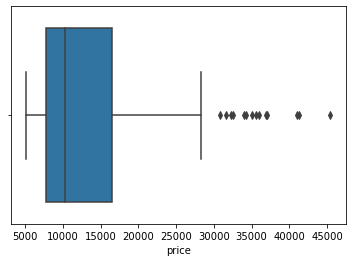

In [24]:
#to detect outlier in the dataset
#main focus on target/output variable/dependent variable
# Independent(x) and Dependent variable(y)
#e.g sum of any 2 number is dependent on the 2 number , here sum is dependent and numbers are independent
#outlier considering price
sns.boxplot(data=df,x='price')
plt.show()

In [25]:
df[df['price']>30000].value_counts().sum() #conditional filtering
# to get record above 30000 , insight from above graph

14

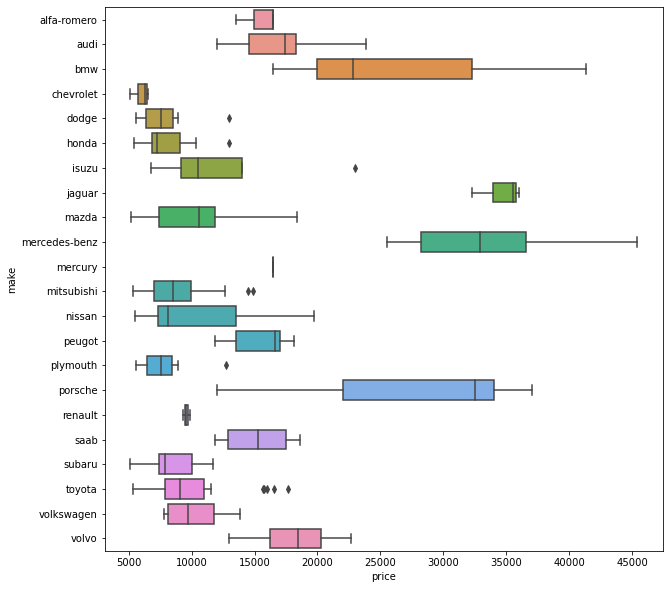

In [26]:
# to get effect of make on price
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='price',y='make')
plt.show()

In [27]:
#13.07.2021

In [28]:
# isuzu data check on outlier
df[(df["make"]=="isuzu")&(df["price"]>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [29]:
# to remove these outlier
df.drop(45,inplace=True)

In [30]:
# toyota data check on outlier
df[(df["make"]=="toyota")&(df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [31]:
# to remove these outlier
df.drop([172,178,179,180,181],inplace=True)

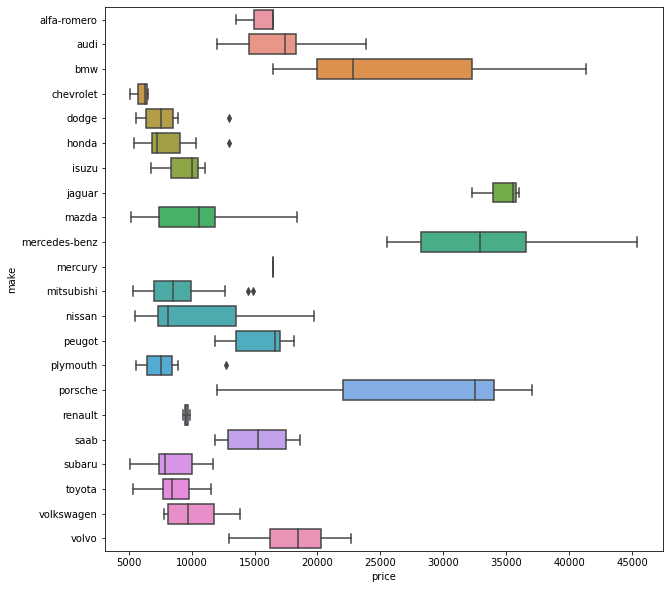

In [32]:
# to check the above outlier removal
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='price',y='make')
plt.show()

In [33]:
# plymouth data check on outlier
df[(df["make"]=="plymouth")&(df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [34]:
# to remove these outlier
df.drop(124,inplace=True)

In [35]:
# mitsubishi data check on outlier
df[(df["make"]=="mitsubishi")&(df["price"]>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [36]:
# to remove these outlier
df.drop([83,84],inplace=True)

In [37]:
# mitsubishi data check on outlier
df[(df["make"]=="honda")&(df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [38]:
# to remove these outlier
df.drop(41,inplace=True)

In [39]:
# mitsubishi data check on outlier
df[(df["make"]=="dodge")&(df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [40]:
# to remove these outlier
df.drop(29,inplace=True)

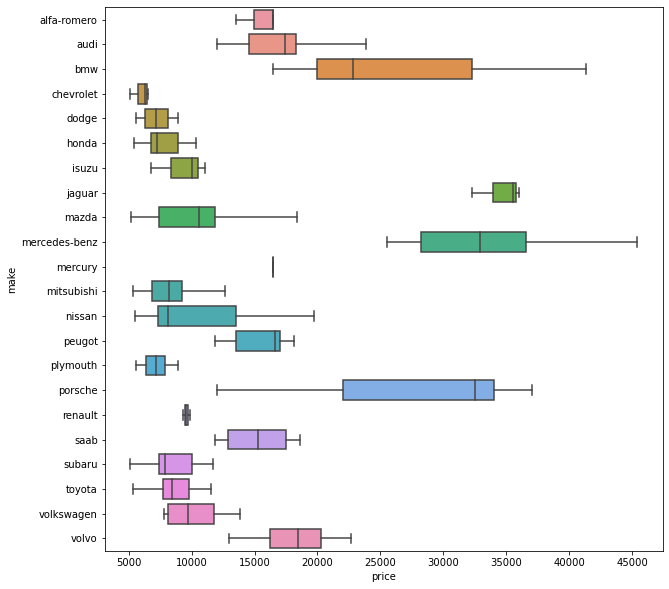

In [41]:
# to check the above outlier removal
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='price',y='make')
plt.show()

In [42]:
'''
Data are of two types : Numerical and Categorical

                              Numerical             
             Discrete                        Continous
             Age-18 etc.                     Money-50.525
             Finite                           Infinite
    countable but not measureable      measureable but not countable speed etc.


                         Categorical(str type)
                                
      Nominal                    Ordinal                      Boolean
Eye colour(red etc.)   count+order but not measure      True or False based
count but not order       (Hot,hotter,hottest)

'''

'\nData are of two types : Numerical and Categorical\n\n                              Numerical             \n             Discrete                        Continous\n             Age-18 etc.                     Money-50.525\n             Finite                           Infinite\n    countable but not measureable      measureable but not countable speed etc.\n\n\n                         Categorical(str type)\n                                \n      Nominal                 Ordinal                         Boolean\nEye colour(red etc.)  count+order but not measure       True or False based\ncount but not order        (Hot,hotter,hottest)\n\n'

In [43]:
#3. Handle categorical data
# Categorical is non-numerical
# convert categorical to numerical data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    object 
 3   fuel-type          194 non-null    object 
 4   body-style         194 non-null    object 
 5   drive-wheels       194 non-null    object 
 6   engine-location    194 non-null    object 
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    object 
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 29.2+ KB


In [44]:
'''
two methods to change categorical to numerical
1. One Hot Encoding            2. Label Encoding

we mostly use Label encoding 

One Hot Encoding : pd.get_dummies
Not used by Data Scientist

e.g. Supposedly we consider fuel type , 

df["fuel-type"].value_counts()  --> 179G 20D
pd.get_dummies(df["fuel-type"]) # temporary change

it results in 0 and 1 (binary form data) where 1 is true and 0 is false
which is complicated
''' 

'\ntwo methods to change categorical to numerical\n1. One Hot Encoding            2. Label Encoding\n\nwe mostly use Label encoding \n\nOne Hot Encoding : pd.get_dummies\nNot used by Data Scientist\n\ne.g. Supposedly we consider fuel type , \n\ndf["fuel-type"].value_counts()  --> 179G 20D\npd.get_dummies(df["fuel-type"]) # temporary change\n\nit results in 0 and 1 (binary form data) where 1 is true and 0 is false\nwhich is complicated\n'

In [45]:
df["fuel-type"].value_counts()

gas       174
diesel     20
Name: fuel-type, dtype: int64

In [46]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [47]:
from sklearn.preprocessing import LabelEncoder 
# Laber encoder is inbuilt class

In [48]:
#le=LabelEncoder()
#df['fuel-type']=le.fit_transform(df['fuel-type'])
#fit_transform() - inbuilt method

In [49]:
#seperate the numerical data and categorical data
# 2 df to be created

df1=df.select_dtypes(object) #object is categorical
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make             194 non-null    object
 1   fuel-type        194 non-null    object
 2   body-style       194 non-null    object
 3   drive-wheels     194 non-null    object
 4   engine-location  194 non-null    object
 5   engine-type      194 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


In [50]:
df2=df.select_dtypes(["int64","float64"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   width              194 non-null    float64
 3   height             194 non-null    float64
 4   engine-size        194 non-null    int64  
 5   horsepower         194 non-null    float64
 6   city-mpg           194 non-null    int64  
 7   highway-mpg        194 non-null    int64  
 8   price              194 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 20.2 KB


In [51]:
# to convert object type column to numercial with help of LabelEncoder
import warnings
warnings.filterwarnings('ignore')
for col in df1:
    #create object of labelencoder
    le=LabelEncoder()
    df1[col]=le.fit_transform(df1[col]) # assigning it to variable makes it permanent
df1.head(10)   

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
5,1,1,3,1,0,3
6,1,1,3,1,0,3
7,1,1,4,1,0,3
8,1,1,3,1,0,3
9,1,1,2,0,0,3


In [52]:
# Reduce Skewness (normal distribution)

In [53]:
# Normal Distribution(ND) means data is equally distributed on both sides
# ND curve is applied only on numeric type data
# ND is also a frequency curve
# For normal distribution curve : use inbuilt method distplot()
# distplot() inbuilt method of seaborn library
# sns.distplot() 

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   width              194 non-null    float64
 3   height             194 non-null    float64
 4   engine-size        194 non-null    int64  
 5   horsepower         194 non-null    float64
 6   city-mpg           194 non-null    int64  
 7   highway-mpg        194 non-null    int64  
 8   price              194 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 20.2 KB


symboling
0.21386866184357742


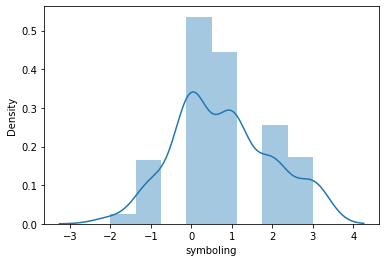

normalized-losses
0.848205953606264


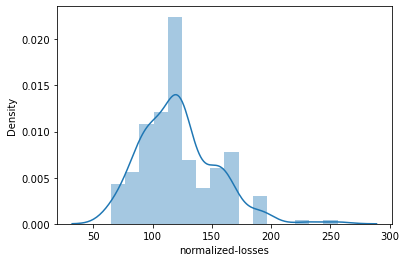

width
0.9140400320504322


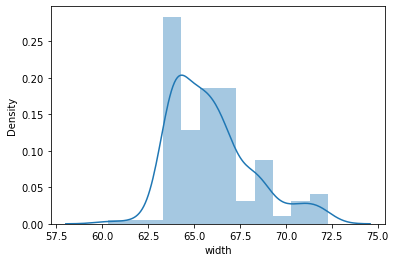

height
0.013839962443639326


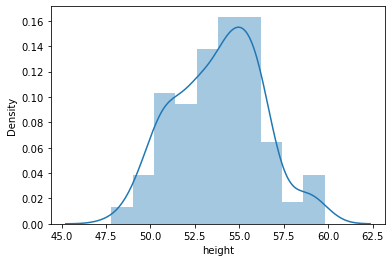

engine-size
2.0541257626466156


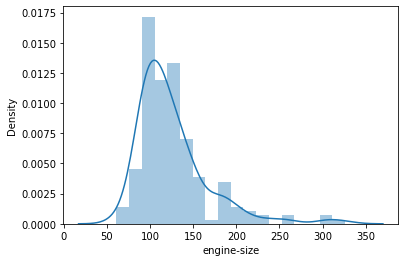

horsepower
1.5556576549504106


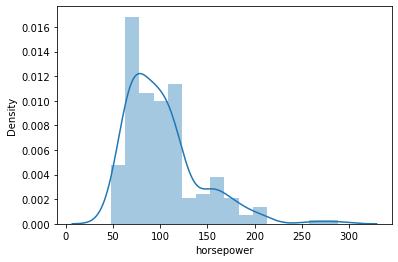

city-mpg
0.5999073033714895


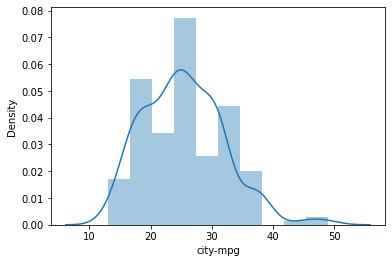

highway-mpg
0.4760310091695327


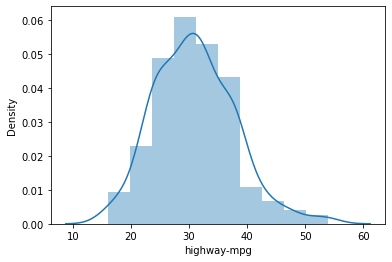

price
1.8166794702973463


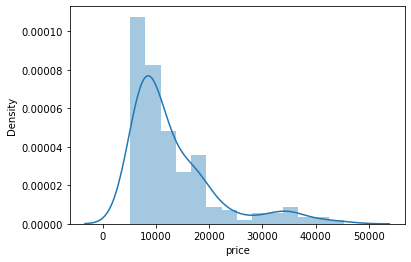

In [55]:
# find skewness using inbuilt skew() method
# scipy.stats - from here we import skew

# to check skewness value in each and every numerical column

from scipy.stats import skew

for col in df2:
    print(col)
    print(skew(df2[col]))
    sns.distplot(df2[col])
    plt.show()

In [56]:
'''
nearer to 1 better the relation
Symboling            skewness            corr with output(price)
                       0.21              -0.08(bad correaltion)
Width                  0.91              0.730(good correlation)

in symboling we need to apply transformation(sqrt/log) due to bad correlation
while in width no transformation required due to good relation

if skewness is not found we need not apply transformation even if the corr
is bad correlation
'''

'\nnearer to 1 better the relation\nSymboling            skewness            corr with output(price)\n                       0.21              -0.08(bad correaltion)\nWidth                  0.91              0.730(good correlation)\n\nin symboling we need to apply transformation(sqrt/log) due to bad correlation\nwhile in width no transformation required due to good relation\n\nif skewness is not found we need not apply transformation even if the corr\nis bad correlation\n'

In [57]:
# before skweness we need to establish co-relation 
# if correlation is >0.5 is good
# if it is near to 0 correlation is not good 
df2.corr() # corr is for co-relation

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


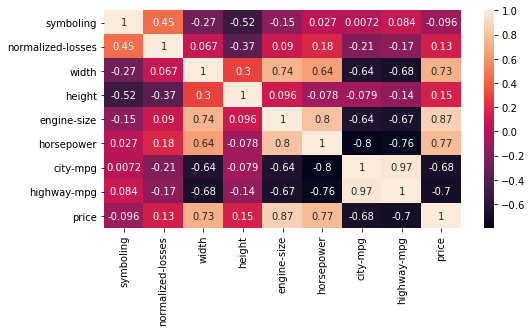

In [58]:
# to visualise corr()  we use seaborns heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df2.corr(),annot=True) #annotation
plt.show()

In [59]:
#we saw : - 
''' good correlation width,engine-size,horsepower,city-mpg,highway-mpg with
target variable price and also find skewness in this column but we will not 
apply transformation to reduce skewness .
but bad correlation between symboling and normalised-losses with price and 
also find skewness in those column so apply transformation to reduce skewness
and the skewness of height is close to zero so not apply transformation 
in this column .
'''

' good correlation width,engine-size,horsepower,city-mpg,highway-mpg with\ntarget variable price and also find skewness in this column but we will not \napply transformation to reduce skewness .\nbut bad correlation between symboling and normalised-losses with price and \nalso find skewness in those column so apply transformation to reduce skewness\nand the skewness of height is close to zero so not apply transformation \nin this column .\n'

In [60]:
#There are 2 types of transformation to reduce skewness
#1. sqrt()    2. log( )
#call this method with the help of numpy library

# It should be taken care that if a column has skewness with bad corr
# but has negative value in its column , we shall not perform any action
# so that our result does not become null

# e.g
np.sqrt(-1)

nan

In [61]:
# First check do we have value in -1
df2[df2['symboling']<0].value_counts().sum()

23

In [62]:
# since we have negative value in symboling column , we wont reduce skewness
df2[df2['normalized-losses']<0].value_counts().sum()

0

In [63]:
# apply sqrt() transformation on normalized losses to reduce skewness permanently
df2["normalized-losses"]=np.sqrt(df2["normalized-losses"])

In [64]:
#check skewness of normalized losses
skew(df2["normalized-losses"])

0.4136415061835428

In [65]:
# Finally we concatenate 2 df and hold in new df
df_new=pd.concat([df2,df1],axis=1) # horizonal is 1 vertical is 0
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [66]:
# Next step in EDA is scaling (make everything of same scale)
'''
There are two types of scaling
1. Min Max Scaler
2. Standard Scaler : most use
'''

'\nThere are two types of scaling\n1. Min Max Scaler\n2. Standard Scaler : most use\n'

In [67]:
# min max scaler : formula - (x-xmin)/(max-min)
# the value ranges from 0 - 1

In [68]:
'''from sklearn.preprocessing import MinMaxScaler # Inbuilt class
for col in df_new:
    mx=MinMaxScaler() # create object of class minmaxscaler
    df_new[col]=mx.fit_transform(df_new[[col]]) # inbuilt func of MinMaxScaler class
    # double bracket since it is 2D array
'''

'from sklearn.preprocessing import MinMaxScaler # Inbuilt class\nfor col in df_new:\n    mx=MinMaxScaler() # create object of class minmaxscaler\n    df_new[col]=mx.fit_transform(df_new[[col]]) # inbuilt func of MinMaxScaler class\n    # double bracket since it is 2D array\n'

In [69]:
#df_new.head() # entire data becomes of same unit
# here value ranges from 0-1  which does not encompass negative value

In [70]:
# use 2nd Method : Standard scaling
# standard scaler works on z-score formula
# z-score = (x-mean(x))/standard deviation(x)
# benefit is value can be negative, positive or 0

from sklearn.preprocessing import StandardScaler
for col in df_new:
    ss=StandardScaler()
    df_new[col]=ss.fit_transform(df_new[[col]])

In [71]:
# feature engineering
df_new.head() # same scale but can be negative positive 0 and not in fix range

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.050618,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852
1,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.423708,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852
2,0.176441,0.082835,-0.179636,-0.582442,0.628957,1.315353,-0.982065,-0.726156,0.423708,-1.934007,0.339032,-0.748984,1.234608,-0.125327,1.943631
3,1.011307,1.349433,0.140924,0.195695,-0.396602,-0.010980,-0.216307,-0.143429,0.107109,-1.774620,0.339032,0.432341,-0.566249,-0.125327,-0.078162
4,1.011307,1.349433,0.232512,0.195695,0.247354,0.320603,-1.135217,-1.308883,0.541657,-1.774620,0.339032,0.432341,-2.367105,-0.125327,-0.078162


In [74]:
# to add new column : feature engineering
# it depends on the dataset
df_new["Area"]=df_new["width"]*df_new["height"]
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,Area
0,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.050618,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852,1.688139
1,1.846173,0.082835,-0.820757,-2.056808,0.104252,0.218578,-0.675762,-0.580474,0.423708,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-3.110852,1.688139
2,0.176441,0.082835,-0.179636,-0.582442,0.628957,1.315353,-0.982065,-0.726156,0.423708,-1.934007,0.339032,-0.748984,1.234608,-0.125327,1.943631,0.104628
3,1.011307,1.349433,0.140924,0.195695,-0.396602,-0.010980,-0.216307,-0.143429,0.107109,-1.774620,0.339032,0.432341,-0.566249,-0.125327,-0.078162,0.027578
4,1.011307,1.349433,0.232512,0.195695,0.247354,0.320603,-1.135217,-1.308883,0.541657,-1.774620,0.339032,0.432341,-2.367105,-0.125327,-0.078162,0.045502


In [ ]:
# outlier is subtype of Anomalies

In [ ]:
'''
EDAss
1. Handle Null Values
2. Handle Outlier
3. Handle Skewness
4. Handle Categorical Data
5. Handle Scaling
6. Feature Engineeing
'''